<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2024-2/Laboratorios/Laboratorio_08_nn_keras__V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 8 Keras
por: Juliana del Valle

# 1. Para el dataset make a moon de sklearn, construir un modelo de una red neuronal con keras para clasificar los datos.

In [1]:
from sklearn.datasets import make_moons
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## Datos

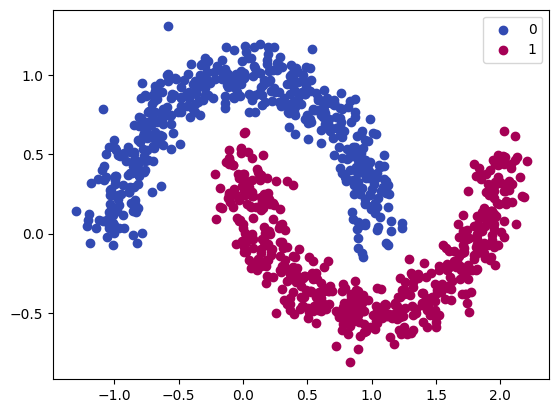

In [2]:
X, y = make_moons(n_samples=1000, noise=0.1, random_state=1)

plt.scatter(X[np.where((y==0)),0],X[np.where((y==0)),1], label='0', color="#324AB2")

plt.scatter(X[np.where((y==1)),0],X[np.where((y==1)),1], label='1', color="#A50055")
plt.legend()
plt.show()

## Red Neuronal

In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(130, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(2) #Retorna el array de logits, el puntaje que el modelo le asigna a cada clase
])


In [4]:
#Tomado del siguiente ejemplo: https://www.tensorflow.org/tutorials/keras/classification
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Entrenamiento

In [5]:
# binary cross entropy:
tf.keras.backend.clear_session()
# Prerprocesado de los datos
n_train = 500
train_X, test_X = X[:n_train, :], X[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]


In [6]:
history = model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=20)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.7622 - loss: 0.6006 - val_accuracy: 0.8360 - val_loss: 0.4244
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8476 - loss: 0.3977 - val_accuracy: 0.8540 - val_loss: 0.3169
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8679 - loss: 0.3002 - val_accuracy: 0.8640 - val_loss: 0.2864
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8789 - loss: 0.2742 - val_accuracy: 0.8740 - val_loss: 0.2709
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8795 - loss: 0.2511 - val_accuracy: 0.8700 - val_loss: 0.2561
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8876 - loss: 0.2327 - val_accuracy: 0.8740 - val_loss: 0.2460
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8943 - loss: 0.2211 - val_accuracy: 0.8680 - val_loss: 0.2389
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8980 - loss: 0.2031 - val_accuracy: 0.8740 - val

## Evaluación de la exactitud

In [7]:
test_loss, test_acc = model.evaluate(test_X,  test_y, verbose=2)

print('\nTest accuracy:', test_acc, '\nTest loss:', test_loss)

16/16 - 0s - 3ms/step - accuracy: 0.9880 - loss: 0.0523

Test accuracy: 0.9879999756813049 
Test loss: 0.05232742056250572


In [8]:
train_loss, train_acc = model.evaluate(train_X, train_y, verbose=2)
print('\nTrain accuracy:', train_acc, '\nTrain loss:', train_loss)

16/16 - 0s - 2ms/step - accuracy: 0.9880 - loss: 0.0513

Train accuracy: 0.9879999756813049 
Train loss: 0.051252614706754684


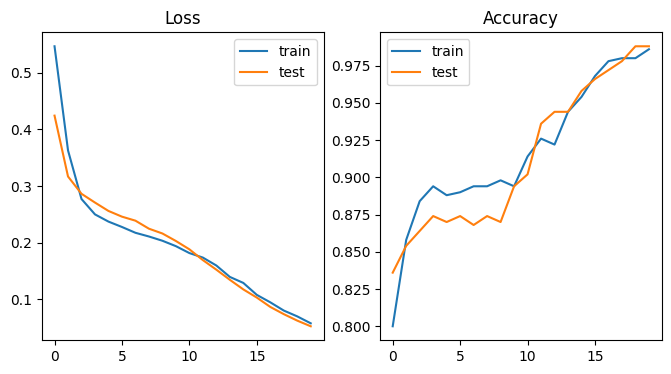

In [9]:
# Gráficas:
plt.figure(figsize=(8,4))
# Gráfica de pérdidas durante el entrenamiento
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# Gráfica de las precisión durante el entrenamiento
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

## Predicciones

In [10]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [11]:
predictions = probability_model.predict(test_X)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


Predicción para el primer dato de testeo

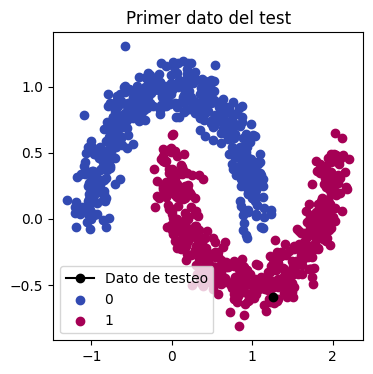

In [12]:
plt.figure(figsize=(4, 4))
plt.title("Primer dato del test")
plt.plot(test_X[0][0], test_X[0][1], marker="o", color="black", label="Dato de testeo")
plt.scatter(X[np.where((y==0)),0],X[np.where((y==0)),1], label='0', color="#324AB2")

plt.scatter(X[np.where((y==1)),0],X[np.where((y==1)),1], label='1', color="#A50055")
plt.legend()
plt.show();

In [13]:
print('La clase con la probabilidad más alta asignada por el modelo es:', np.argmax(predictions[0]))

La clase con la probabilidad más alta asignada por el modelo es: 1


In [14]:
print('La clase real asignada es:', test_y[0])

La clase real asignada es: 1


# 2. Para el dataset load digits, construir un modelo de red neuronal empleando keras para realizar la clasificación.

In [15]:
# Import the necessary modules
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Dataset:
Cada dato es una imagen de 8x8 píxeles, donde los valores de cada píxel varían de 0 a 16. Estas imágenes representan dígitos escritos a mano, los cuales pueden clasificarse en 10 categorías: \(0, 1, 2, 3, 4, 5, 6, 7, 8, 9\). Para cada dígito, hay aproximadamente 180 ejemplos. En total el dataset tiene 1797 datos

In [16]:
X, y = load_digits(return_X_y=True)
n_samples, n_features = X.shape

In [17]:
print(f"Total de muestras {n_samples}")

Total de muestras 1797


Cada fila de \(X\) es un arreglo de 64 elementos que representa una imagen.

In [18]:
X.shape

(1797, 64)

Visualiza los datos

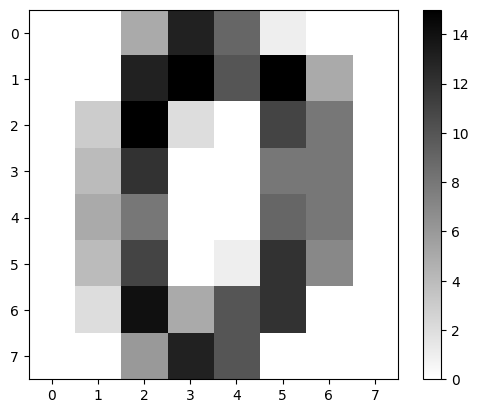

In [19]:
plt.imshow(X[0].reshape(8, 8), cmap="gray_r")
plt.colorbar()

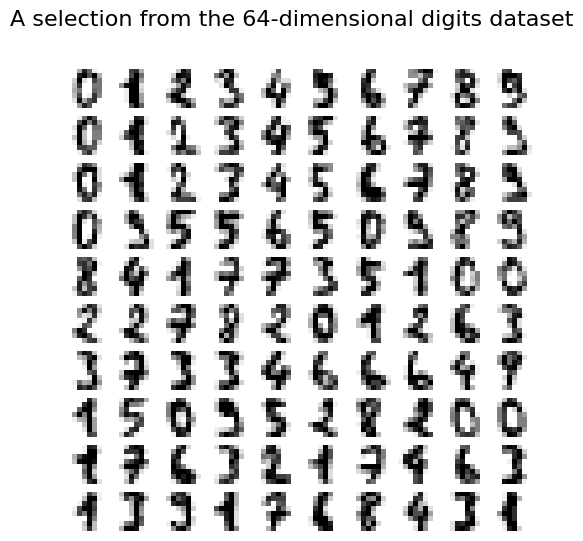

In [20]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Reescala los valores de los píxeles para que estén en un rango de 0 a 1.

In [21]:
X = X / 16.0
y = y /16.0

## Red Neuronal

In [22]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10) #Retorna el array de logits, el puntaje que el modelo le asigna a cada clase
])


In [23]:
#Tomado del siguiente ejemplo: https://www.tensorflow.org/tutorials/keras/classification
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Entrenamiento

In [24]:
# binary cross entropy:
tf.keras.backend.clear_session()

# Preprocesado de los datos
n_train = n_samples//2 #divisipon entera.
train_X, test_X = X[:n_train, :], X[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]


In [25]:
#Alimenta los datos al modelo
model.fit(train_X, train_y, epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0552 - loss: 1.8832    
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1011 - loss: 0.0302 
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0951 - loss: 0.0053 
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0973 - loss: 0.0029 
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0939 - loss: 0.0020 
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1055 - loss: 0.0015 
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1074 - loss: 0.0011 
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1107 - loss: 8.1799e-04 
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0979 - loss: 6.5770e-04
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0935 - loss: 4.8309e-04 


## Evaluación de la exactitud

In [26]:
test_loss, test_acc = model.evaluate(test_X,  test_y, verbose=2)

print('\nTest accuracy:', test_acc, '\nTest loss:', test_loss)

29/29 - 0s - 5ms/step - accuracy: 0.0979 - loss: 5.4178e-04

Test accuracy: 0.09788653999567032 
Test loss: 0.0005417805514298379


Se observa que el rendimiento del modelo en los datos de prueba es inferior al de los datos de entrenamiento, lo que puede ser una señal de sobreajuste ("overfitting").

## Predicciones

In [27]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [28]:
predictions = probability_model.predict(test_X)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


Predicción para el primer dato de testeo

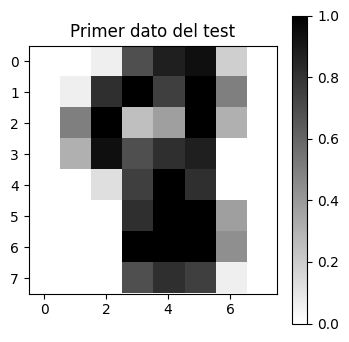

In [29]:
plt.figure(figsize=(4, 4))
plt.title("Primer dato del test")
plt.imshow(test_X[0].reshape(8, 8), cmap="gray_r")
plt.colorbar();

In [30]:
print('El digito con la probabilidad más alta asignada por el modelo es:', np.argmax(predictions[0]))

El digito con la probabilidad más alta asignada por el modelo es: 0


In [31]:
print('El digito real asignada es:', test_y[0])

El digito real asignada es: 0.5
